In [11]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [18]:
inp_np = np.array([1., 2., 3., 4., 5])
tar_np = inp_np

inp = torch.tensor(inp_np).view(-1, 1).float()
tar = torch.tensor(tar_np).view(-1, 1).float()

In [100]:
nn.LayerNorm?

In [130]:
# activation_klass = nn.Softplus
activation_klass = nn.Sigmoid
# activation_klass = nn.ReLU

regressor = nn.Sequential(
    nn.Linear(1, 256),
    activation_klass(),
    nn.Linear(256, 256),
    activation_klass(),
    nn.Linear(256, 256),
    activation_klass(),
    nn.Linear(256, 1)
).float()

optim = torch.optim.Adam(regressor.parameters(), lr=1e-3)

for i in range(2000):
    
    pred = regressor(inp)
    
    inp.requires_grad_(True)
    
    grad = torch.autograd.grad(
        outputs=pred,
        inputs=inp,
        create_graph=True,
        grad_outputs=torch.ones_like(pred)
    )[0]

    gradient_norm_loss = torch.mean(grad ** 2)
    
    loss = torch.mean((pred - tar) ** 2)
    
    optim.zero_grad()
    
    loss.backward(retain_graph=True)
    gradient_norm_loss.backward()
    
    optim.step()

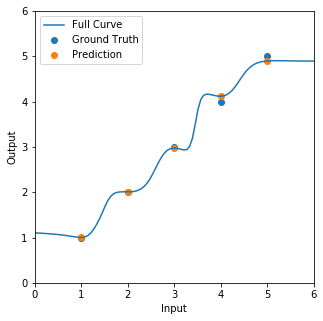

In [132]:
plt.figure(figsize=(5, 5))
plt.scatter(inp_np, tar_np, label='Ground Truth')
plt.scatter(inp_np, regressor(inp).detach().numpy().reshape(-1), label='Prediction')
xs = np.linspace(0, 6, 100)
plt.plot(xs, regressor(torch.tensor(xs).view(-1, 1).float()).detach().numpy().reshape(-1), label='Full Curve')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()